## **IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## **LOAD DATASET**

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/kevynalifian/Dataset/main/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()
print("\n")
iris['Species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB




Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
iris.drop('Id',axis=1,inplace=True)
iris.shape

(150, 5)

## **EDA**

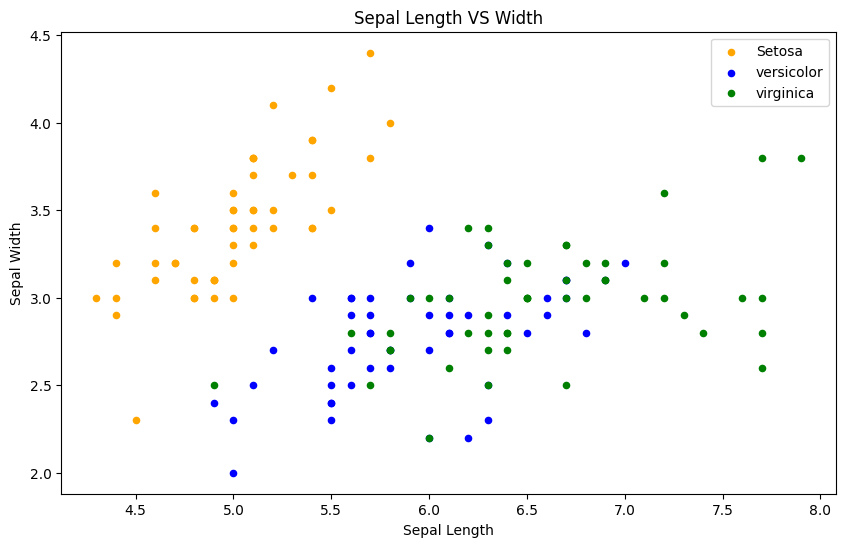

In [5]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

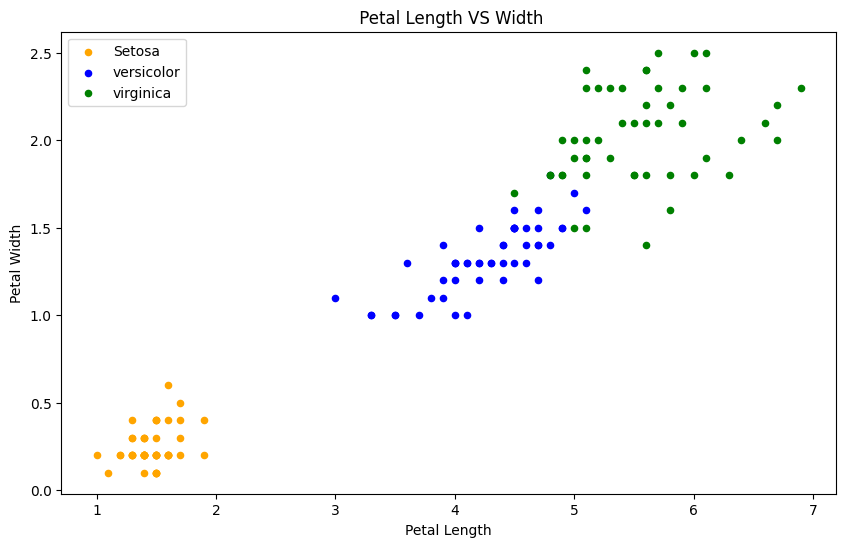

In [6]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## **SPLIT DATASET**

In [7]:
train, test = train_test_split(iris, test_size = 0.2)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [8]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

## **MODEL SVM**

In [9]:
svm = SVC(probability=True)
svm.fit(X_train , y_train)
svm_pred = svm.predict(X_test)
train_acc1 = svm.score(X_train , y_train)
test_acc1 = accuracy_score(y_test , svm_pred)

In [10]:
print(train_acc1)
print(test_acc1)

0.95
0.9666666666666667


In [11]:
print(classification_report(y_test, svm_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## **MODEL KNN**

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)
train_acc1 = knn.score(X_train , y_train)
test_acc1 = accuracy_score(y_test , knn_pred)

In [13]:
print(train_acc1)
print(test_acc1)

0.9666666666666667
0.9666666666666667


In [14]:
print(classification_report(y_test, knn_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
nb = GaussianNB()
nb.fit(X_train , y_train)
nb_pred = knn.predict(X_test)
train_acc1 = nb.score(X_train , y_train)
test_acc1 = accuracy_score(y_test , nb_pred)

In [16]:
print(train_acc1)
print(test_acc1)

0.9583333333333334
0.9666666666666667


In [17]:
print(classification_report(y_test, nb_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [26]:
print("Masukkan panjang dan lebar kelopak dan mahkota:")
input_data = []
for feature_name in X_test:
    val = float(input(f"{feature_name}: "))
    input_data.append(val)

# Melakukan prediksi dengan model yang telah dilatih
predicted_class = knn.predict([input_data])

# Menampilkan hasil prediksi
print("Prediksi spesies:", predicted_class[0])

Masukkan panjang dan lebar kelopak dan mahkota:
SepalLengthCm: 5.1
SepalWidthCm: 3.5
PetalLengthCm: 1.4
PetalWidthCm: 0.2
Prediksi spesies: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
